<a href="https://colab.research.google.com/github/orodriguezq/orodriguezq-Senales_Y_Sistemas/blob/main/Talleres/Taller_2_SyS_Punto4y5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 4:

# Modulación AM con detección coherente

**Modulación en amplitud (AM)**  
Se genera a partir de una portadora  
\[
c(t) = A_c \cos(2\pi f_c t)
\]  
y una señal mensaje \(m(t)\), escalada para que \(\max|m(t)| = 1\).  
La señal AM con índice de modulación \(\mu\) es:  
\[
s(t) = \bigl(1 + \mu\,m(t)\bigr)\;A_c\cos(2\pi f_c t).
\]

---

**Detección coherente**  
1. En el receptor se multiplica la señal recibida \(s(t)\) por una réplica sincronizada de la portadora (fase \(\theta=0\)):  
   \[
     s(t)\,\times\,\cos(2\pi f_c t)
     = \frac{A_c}{2}\,(1 + \mu\,m(t)) \;+\; \frac{A_c}{2}\,(1 + \mu\,m(t))\cos(4\pi f_c t)
   \]  
2. Se aplica un **filtro pasa-bajas** para eliminar el término en \(2f_c\), quedando  
   \[
     y(t) = \frac{A_c}{2}\,(1 + \mu\,m(t)).
   \]  
3. Finalmente se escala por \(2/(\mu A_c)\) para recuperar \(m(t)\).

---

**Aplicaciones principales**  
- **Radio AM**: transmisión de audio en banda comercial.  
- **Enlaces de telegestión y telemetría**: requiere referencia de fase para extraer la señal.  
- **Comunicaciones profesionales** (aviación, radiodifusión de baja complejidad) donde se dispone de un oscilador local sincronizado.  



In [1]:
# ==============================
# Bloque 0: Instalación de dependencias
# ==============================
!pip install --upgrade numpy matplotlib


In [2]:
# ==============================
# Bloque 1: Imports y parámetros generales
# ==============================
import numpy as np
import matplotlib.pyplot as plt

# Parámetros usuario
fs    = 20000      # frecuencia de muestreo [Hz]
fc    = 2000       # frecuencia de portadora [Hz]
mu    = 0.8        # índice de modulación (0≤μ≤1)
Tsim  = 0.01       # duración de simulación [s]

# Vector tiempo
t = np.linspace(0, Tsim, int(fs*Tsim), endpoint=False)


In [3]:
# ==============================
# Bloque 2: Definir señales mensaje
# ==============================
# 2.1 Pulso rectangular de ancho T/4 cada periodo T=1/fc
T0 = 1/fc
m_rect = ((t % T0) < (T0/4)).astype(float)*2 - 1   # pulso nivel ±1

# 2.2 Cosenoidal
fm = 200  # Hz de señal mensaje
m_cos = np.cos(2*np.pi*fm*t)


In [4]:
# ==============================
# Bloque 3: Funciones de graficado con rfft
# ==============================
def plot_time_and_freq(x, fs, title):
    N = len(x)
    # Tiempo
    plt.figure(figsize=(7,3))
    plt.plot(t, x, lw=1)
    plt.title(f"{title} — tiempo")
    plt.xlabel("t [s]"); plt.ylabel("amplitud")
    plt.xlim(0, 5/fm)    # 5 ciclos de la señal mensaje
    plt.grid(True)

    # Espectro con rfft
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(N, d=1/fs)
    plt.figure(figsize=(7,3))
    plt.plot(freqs, np.abs(X)/N, lw=1)
    plt.title(f"{title} — espectro (rfft)")
    plt.xlabel("f [Hz]"); plt.ylabel("magnitud")
    plt.xlim(0, 4*fc)     # mostrar hasta 2x portadora
    plt.grid(True)


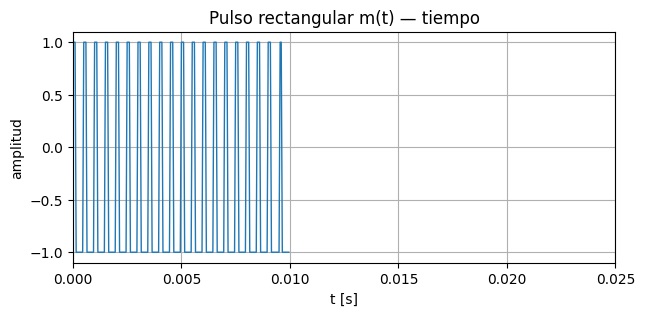

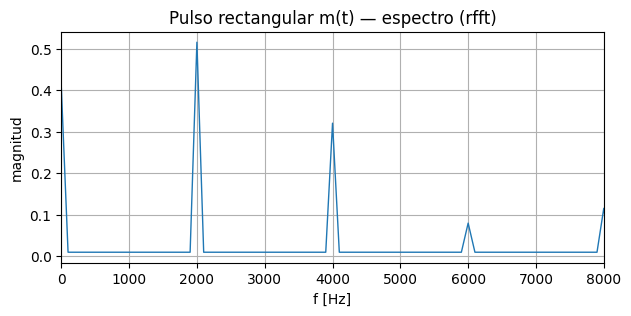

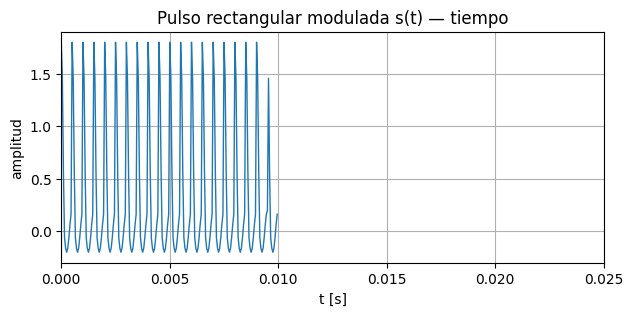

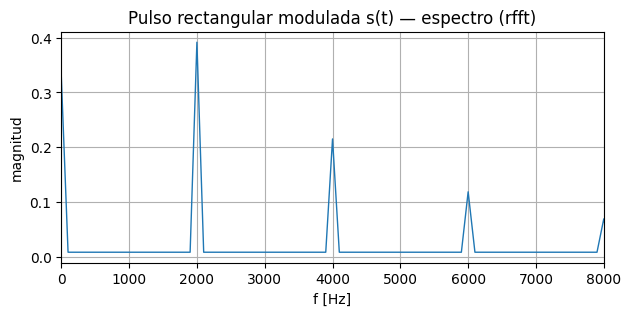

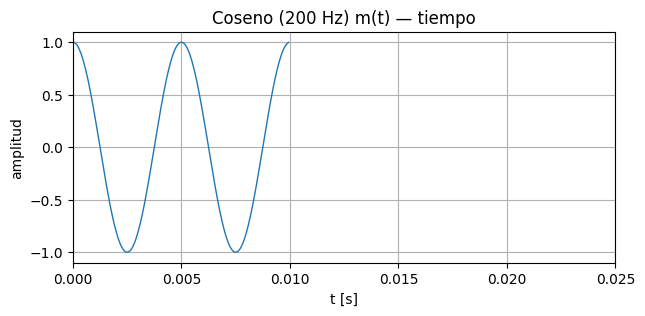

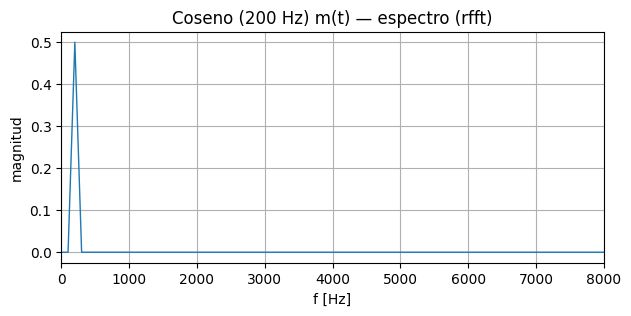

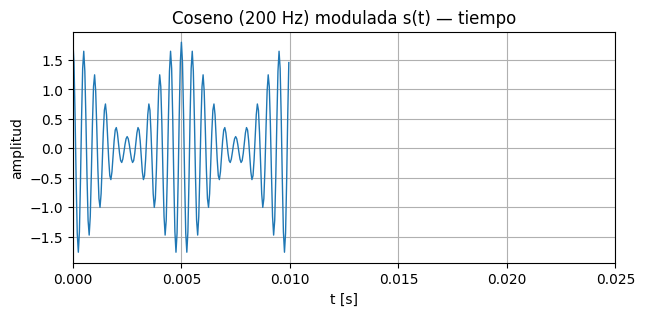

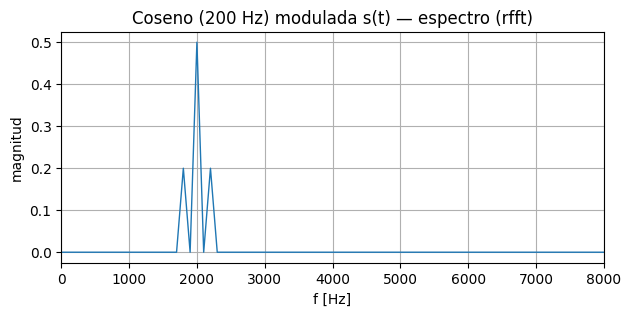

In [5]:
# ==============================
# Bloque 4: Generar y graficar señales AM
# ==============================
# Señal portadora
carrier = np.cos(2*np.pi*fc*t)

for name, m in [("Pulso rectangular", m_rect),
                ("Coseno (200 Hz)", m_cos)]:
    # AM
    s = (1 + mu*m) * carrier

    # Plots
    plot_time_and_freq(m,   fs, f"{name} m(t)")
    plot_time_and_freq(s,   fs, f"{name} modulada s(t)")


In [6]:
# ==============================
# Bloque 5: Reproducción de audio (opcional)
# ==============================
from IPython.display import Audio
# Sólo lo usas si quieres oír en Colab
Audio(((1+mu*m_cos)*carrier), rate=fs)


Punto 5.

In [ ]:
# ==============================
# Bloque 0: Instalación de dependencias
# ==============================
!pip install --upgrade yt-dlp scipy numpy matplotlib
!apt-get update && apt-get install -y ffmpeg


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# ==============================
# Bloque 1: Descarga y carga de audio desde YouTube
# ==============================
import subprocess
import numpy as np
from scipy.io import wavfile

# 1) Pon aquí tu URL (puede traer params extra)
raw_url = 'https://www.youtube.com/watch?v=aKho-toCrDo&ab_channel=DaddyYankee-Topic'
video_id = raw_url.split('v=')[1].split('&')[0]
clean_url = f'https://www.youtube.com/watch?v={video_id}'

# 2) Descarga y convierte a WAV
subprocess.run([
    'yt-dlp',
    '-x', '--audio-format', 'wav',
    '-o', 'mensaje.wav',
    clean_url
], check=True)

# 3) Lee el WAV y extrae 20–25 s
fs, audio_full = wavfile.read('mensaje.wav')
audio_full = audio_full.astype(float)
if audio_full.ndim > 1:
    audio_full = audio_full[:,0]

t0, t1 = 20, 25
i0, i1 = int(fs*t0), int(fs*t1)
m = audio_full[i0:i1]                # señal mensaje
t = np.arange(len(m)) / fs

# 4) Índice μ=1 ⇒ Ac = max|m|
Ac = np.max(np.abs(m))
print(f"fs={fs} Hz, muestras={len(m)}, Ac={Ac:.1f}")


fs=48000 Hz, muestras=240000, Ac=32768.0


In [ ]:
# ==============================
# Bloque 2: Imports y función de graficado
# ==============================
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

def plot_time_freq(x, fs, title, t_lim=None, f_lim=None):
    N = len(x)
    T = 1/fs
    time = np.arange(N)*T
    Xf = np.fft.fftshift(np.fft.fft(x))
    freqs = np.fft.fftshift(np.fft.fftfreq(N, d=T))

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,5))
    ax1.plot(time, x)
    ax1.set_title(f'{title} — tiempo')
    ax1.set_xlabel('t [s]')
    if t_lim: ax1.set_xlim(t_lim)

    ax2.plot(freqs, np.abs(Xf)/N)
    ax2.set_title(f'{title} — espectro')
    ax2.set_xlabel('f [Hz]')
    if f_lim: ax2.set_xlim(f_lim)
    plt.tight_layout()



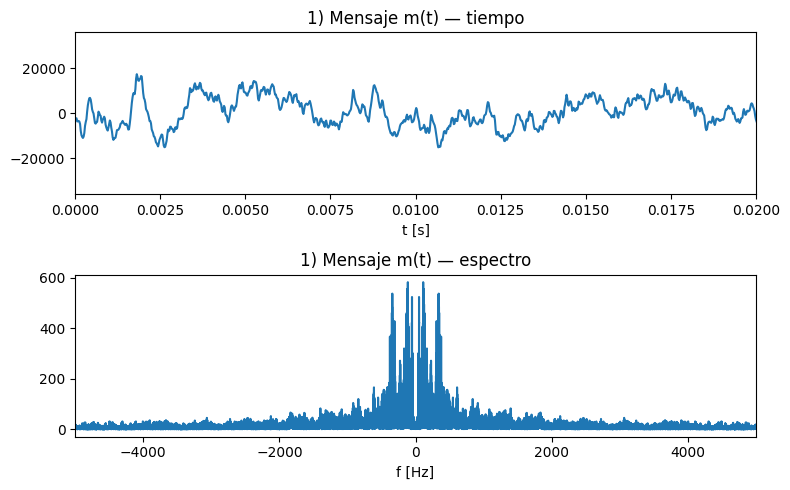

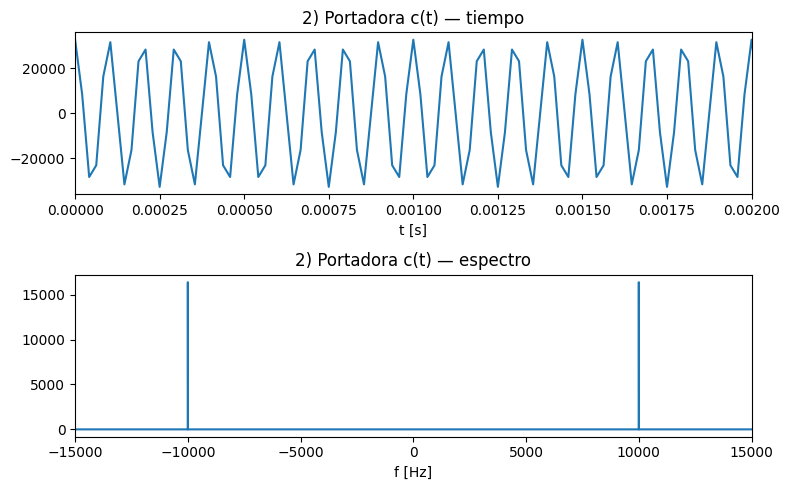

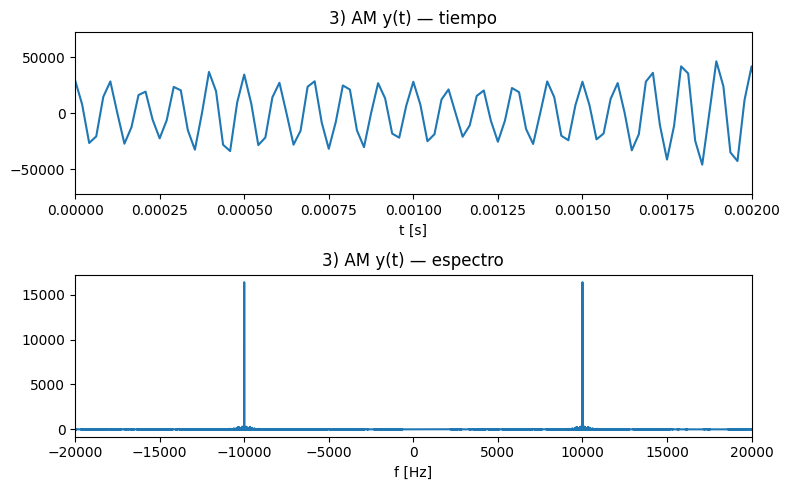

In [ ]:
# ==============================
# Bloque 3: Señal mensaje, portadora y AM con carrier
# ==============================
# 3.1 Mensaje
plot_time_freq(m, fs, '1) Mensaje m(t)', t_lim=(0,0.02), f_lim=(-5000,5000))
Audio(m/np.max(np.abs(m)), rate=fs)

# 3.2 Portadora
f0 = 10000  # Hz (elige menor a fs/2)
carrier = Ac * np.cos(2*np.pi*f0*t)
plot_time_freq(carrier, fs, '2) Portadora c(t)', t_lim=(0,0.002), f_lim=(-15000,15000))
Audio(carrier/Ac, rate=fs)

# 3.3 Modulada AM (índice μ=1)
r = (1 + m/Ac) * carrier
plot_time_freq(r, fs, '3) AM y(t)', t_lim=(0,0.002), f_lim=(-20000,20000))
Audio(r/np.max(np.abs(r)), rate=fs)



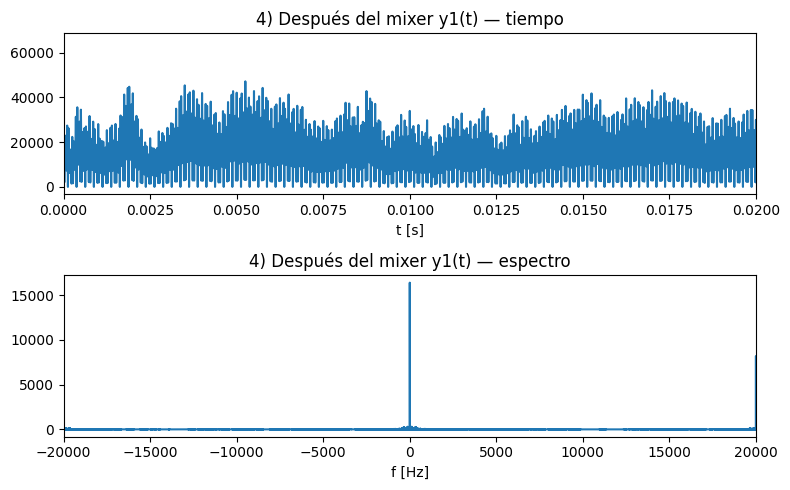

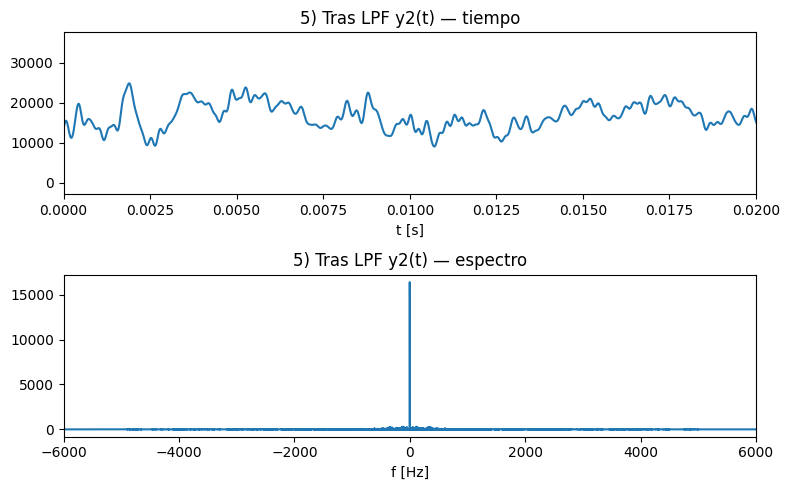

In [ ]:
# ==============================
# Bloque 4: Demodulación coherente (DSB-CS)
# ==============================
# 4.1 Mezclador: producto con la misma portadora
y1 = r * np.cos(2*np.pi*f0*t)
plot_time_freq(y1, fs, '4) Después del mixer y1(t)', t_lim=(0,0.02), f_lim=(-20000,20000))
# Audio de y1 completo no es muy útil → va distorsionado

# 4.2 Filtrado pasa-bajas ideal (por FFT)
Y1 = np.fft.fft(y1)
freqs = np.fft.fftfreq(len(Y1), d=1/fs)
B = 5000  # ancho de paso-bajas en Hz
mask = np.abs(freqs) < B
y2 = np.real(np.fft.ifft(Y1 * mask))
plot_time_freq(y2, fs, '5) Tras LPF y2(t)', t_lim=(0,0.02), f_lim=(-6000,6000))
Audio(y2/np.max(np.abs(y2)), rate=fs)


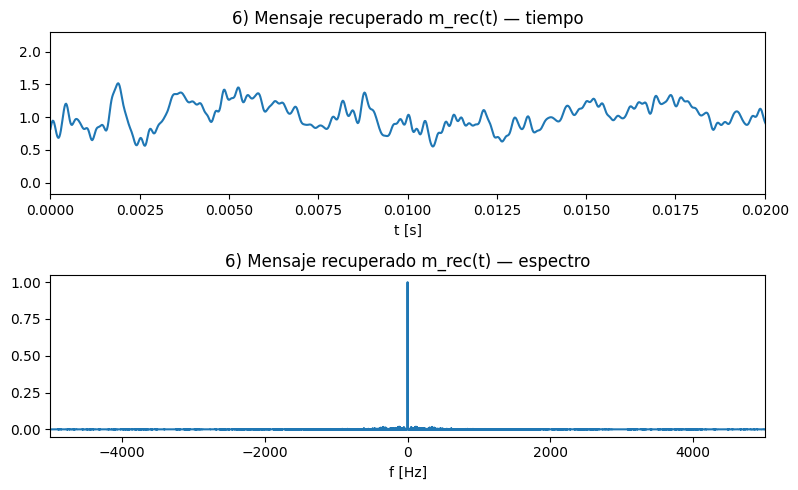

In [ ]:
# ==============================
# Bloque 5: Escalado y recuperación final
# ==============================
m_rec = (2/Ac) * y2
plot_time_freq(m_rec, fs, '6) Mensaje recuperado m_rec(t)', t_lim=(0,0.02), f_lim=(-5000,5000))
Audio(m_rec/np.max(np.abs(m_rec)), rate=fs)
